In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv("sentiment_analysis.ipynb.csv")
df.head()



,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [3]:
df = df.drop(columns=['Unnamed: 0.1'])


In [4]:
df.isnull().sum()


Unnamed: 0    0
Text          0
Sentiment     0
Timestamp     0
User          0
Platform      0
Hashtags      0
Retweets      0
Likes         0
Country       0
Year          0
Month         0
Day           0
Hour          0
dtype: int64

In [5]:
df['Sentiment'] = df['Sentiment'].astype(str)
df['Sentiment'] = df['Sentiment'].str.strip()
df['Sentiment'] = df['Sentiment'].str.capitalize()


In [6]:
df['Sentiment'].unique()


array(['Positive', 'Negative', 'Neutral', 'Anger', 'Fear', 'Sadness',
       'Disgust', 'Happiness', 'Joy', 'Love', 'Amusement', 'Enjoyment',
       'Admiration', 'Affection', 'Awe', 'Disappointed', 'Surprise',
       'Acceptance', 'Adoration', 'Anticipation', 'Bitter', 'Calmness',
       'Confusion', 'Excitement', 'Kind', 'Pride', 'Shame', 'Elation',
       'Euphoria', 'Contentment', 'Serenity', 'Gratitude', 'Hope',
       'Empowerment', 'Compassion', 'Tenderness', 'Arousal', 'Enthusiasm',
       'Fulfillment', 'Reverence', 'Despair', 'Grief', 'Loneliness',
       'Jealousy', 'Resentment', 'Frustration', 'Boredom', 'Anxiety',
       'Intimidation', 'Helplessness', 'Envy', 'Regret', 'Curiosity',
       'Indifference', 'Numbness', 'Melancholy', 'Nostalgia',
       'Ambivalence', 'Determination', 'Zest', 'Hopeful', 'Proud',
       'Grateful', 'Empathetic', 'Compassionate', 'Playful',
       'Free-spirited', 'Inspired', 'Confident', 'Bitterness', 'Yearning',
       'Fearful', 'Apprehensiv

In [7]:
valid = ['Positive', 'Negative', 'Neutral']
df = df[df['Sentiment'].isin(valid)]


In [8]:
df.shape


(67, 14)

In [9]:
df['Text'] = df['Text'].astype(str)
df['Text'] = df['Text'].str.lower()
df['Text'] = df['Text'].str.replace('[^a-zA-Z ]', '', regex=True)


In [10]:
df['Sentiment'].value_counts()


Sentiment
Positive    45
Neutral     18
Negative     4
Name: count, dtype: int64

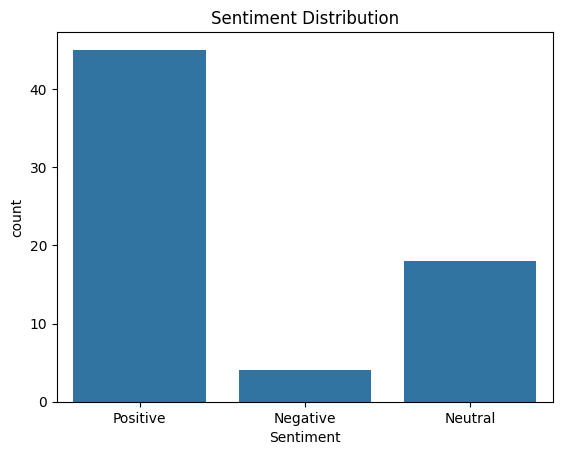

In [11]:
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()


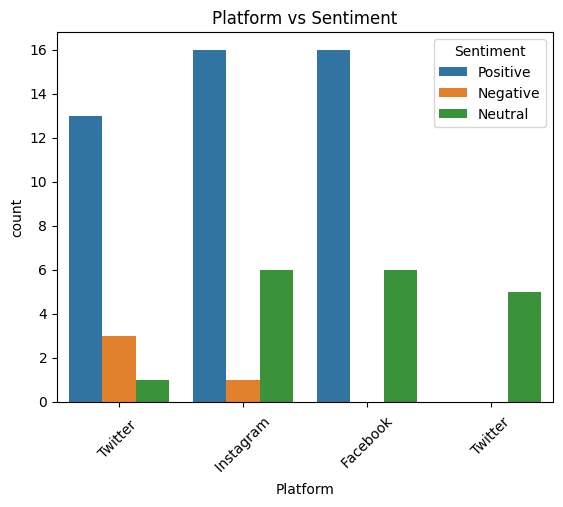

In [12]:
sns.countplot(x='Platform', hue='Sentiment', data=df)
plt.xticks(rotation=45)
plt.title('Platform vs Sentiment')
plt.show()


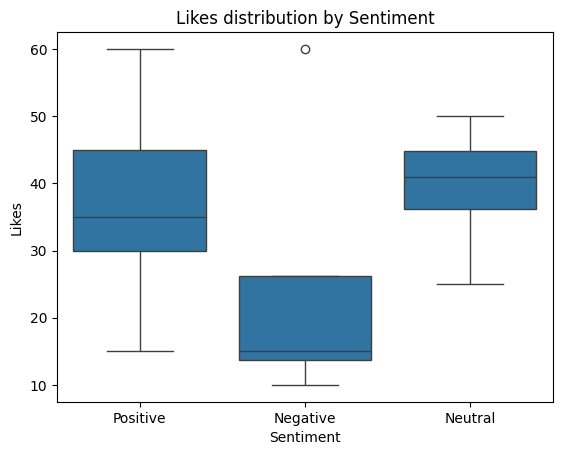

In [13]:
sns.boxplot(x='Sentiment', y='Likes', data=df)
plt.title('Likes distribution by Sentiment')
plt.show()


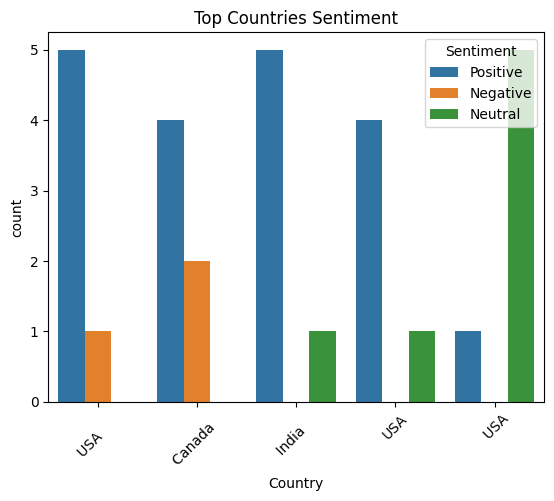

In [14]:
top_countries = df['Country'].value_counts().head(5).index
sns.countplot(x='Country', hue='Sentiment',
              data=df[df['Country'].isin(top_countries)])
plt.xticks(rotation=45)
plt.title('Top Countries Sentiment')
plt.show()


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
df = pd.read_csv("sentiment_analysis.ipynb.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [17]:
df['Country'] = df['Country'].str.strip().str.title()


In [18]:
df.columns


Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [19]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

df['clean_text'] = df['Text'].apply(clean_text)
df[['Text', 'clean_text']].head()


,Text,clean_text
0,Enjoying a beautiful day at the park! ...,enjoying a beautiful day at the park ...
1,Traffic was terrible this morning. ...,traffic was terrible this morning ...
2,Just finished an amazing workout! 💪 ...,just finished an amazing workout
3,Excited about the upcoming weekend getaway! ...,excited about the upcoming weekend getaway ...
4,Trying out a new recipe for dinner tonight. ...,trying out a new recipe for dinner tonight ...


In [20]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
df['clean_text'] = df['clean_text'].apply(
    lambda x: " ".join(word for word in x.split() if word not in stop_words)
)

df[['Text', 'clean_text']].head()


,Text,clean_text
0,Enjoying a beautiful day at the park! ...,enjoying beautiful day park
1,Traffic was terrible this morning. ...,traffic terrible morning
2,Just finished an amazing workout! 💪 ...,finished amazing workout
3,Excited about the upcoming weekend getaway! ...,excited upcoming weekend getaway
4,Trying out a new recipe for dinner tonight. ...,trying new recipe dinner tonight


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)

X = tfidf.fit_transform(df['clean_text'])
y = df['Sentiment']


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [24]:
def map_sentiment(s):
    s = s.lower()
    if s in ['positive', 'joy', 'happy', 'excitement']:
        return 'Positive'
    elif s in ['negative', 'sad', 'angry', 'frustrated']:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['Sentiment'].apply(map_sentiment)


In [28]:
df['Sentiment'].head(20)



0      Positive  
1      Negative  
2      Positive  
3      Positive  
4      Neutral   
5      Positive  
6      Positive  
7      Positive  
8      Negative  
9      Neutral   
10     Positive  
11     Negative  
12     Positive  
13     Positive  
14     Neutral   
15     Positive  
16     Positive  
17     Positive  
18     Neutral   
19     Negative  
Name: Sentiment, dtype: object

In [29]:
positive_words = ['good', 'happy', 'love', 'amazing', 'excited', 'beautiful', 'great', 'fun']
negative_words = ['bad', 'sad', 'hate', 'terrible', 'angry', 'worst', 'traffic', 'boring']

def sentiment_from_text(text):
    text = text.lower()
    if any(word in text for word in positive_words):
        return 'Positive'
    elif any(word in text for word in negative_words):
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['clean_text'].apply(sentiment_from_text)


In [30]:
df['sentiment_label'].value_counts()


sentiment_label
Neutral     671
Positive     46
Negative     15
Name: count, dtype: int64

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)

X = tfidf.fit_transform(df['clean_text'])
y = df['sentiment_label']

X.shape, y.shape


((732, 2468), (732,))

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [35]:
y_pred = model.predict(X_test)


In [36]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9047619047619048
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         4
     Neutral       0.90      1.00      0.95       133
    Positive       0.00      0.00      0.00        10

    accuracy                           0.90       147
   macro avg       0.30      0.33      0.32       147
weighted avg       0.82      0.90      0.86       147



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


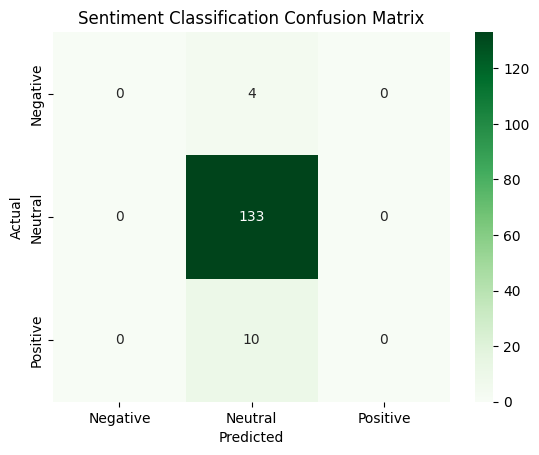

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=model.classes_,
            yticklabels=model.classes_,
            cmap='Greens')

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Sentiment Classification Confusion Matrix")
plt.show()
